Этот проект демонстрирует навыки работы со свёрточными сетями. Мы обучим нашу сеть отличать мотоциклы по видам:
чопперы, спортивные, классика, туристические и эндуро. Коммерческая цель - повысить точность таргетированной рекламы
пользователям-мотоциклистам в зависимости от их вида техники.

In [10]:
# Импортируем все библиотеки и модули которые будут задействованы в этом проекте.

import requests
import numpy as np
import cv2
import os
import shutil
from PIL import ImageFile

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16

import matplotlib.pyplot as plt

print('Import complete.')

Import complete.


In [3]:
subscription_key = "667fb92ef82a41a7be1d4a13099a1915"
search_terms = ['sport motorcycle', 'chopper motorcycle', 'classic motorcycle', 'enduro motorcycle', 'tourer motorcycle']
number_of_images_per_request = 100
search_url = "https://api.cognitive.microsoft.com/bing/v7.0/images/search"

In [4]:
def create_folder(name_folder):
    path = os.path.join(name_folder)

    if not os.path.exists(path):
        os.makedirs(path)
        print('------------------------------')
        print("create folder with path {0}".format(path))
        print('------------------------------')

    else:
        print('------------------------------')
        print("folder exists {0}".format(path))
        print('------------------------------')
        return path

def get_results():
    search = requests.get(search_url, headers=headers, 
                          params=params)
    search.raise_for_status()
    return search.json()

def write_image(photo):
    r = requests.get(v["contentUrl"], timeout=250)
    f = open(photo, "wb")
    f.write(r.content)
    f.close()

In [4]:
for category in search_terms:
    folder = create_folder(category)
    headers = {"Ocp-Apim-Subscription-Key": subscription_key}
    params = {"q": category, "offset": 0,
              "count": number_of_images_per_request}
    results = get_results()
    total = 0

    for offset in range(0, results["totalEstimatedMatches"],
                        number_of_images_per_request):
        params["offset"] = offset
        results = get_results()

        for v in results["value"]:
            try:
                ext = v["contentUrl"][v["contentUrl"].
                                          rfind("."):]
                photo = os.path.join(category, "{}{}".
                                     format('{}'.format(category)
                                     + str(total).zfill(6), ext))

                write_image(photo)
                print("saving: {}".format(photo))
                image = cv2.imread(photo)
                if image is None:
                    print("deleting: {}".format(photo))
                    os.remove(photo)
                    continue

                total += 1


            except Exception as e:
#                 if type(e) in EXCEPTIONS:
                    continue

------------------------------
create folder with path sport motorcycle
------------------------------
saving: sport motorcycle\sport motorcycle000000.jpg
deleting: sport motorcycle\sport motorcycle000000.jpg
saving: sport motorcycle\sport motorcycle000000.jpg
saving: sport motorcycle\sport motorcycle000001.jpg
saving: sport motorcycle\sport motorcycle000002.jpg
saving: sport motorcycle\sport motorcycle000003.jpg
saving: sport motorcycle\sport motorcycle000004.jpg
saving: sport motorcycle\sport motorcycle000005.jpg
saving: sport motorcycle\sport motorcycle000006.jpg
saving: sport motorcycle\sport motorcycle000007.jpg
saving: sport motorcycle\sport motorcycle000008.jpg
saving: sport motorcycle\sport motorcycle000009.jpg
saving: sport motorcycle\sport motorcycle000010.png
saving: sport motorcycle\sport motorcycle000011.jpg
saving: sport motorcycle\sport motorcycle000012.jpg
saving: sport motorcycle\sport motorcycle000013.png
saving: sport motorcycle\sport motorcycle000014.jpg
saving: spo

In [ ]:
# С помощью утилиты image-cleaner удаляем дубликаты изображений через командную строку командой:
# image-cleaner <path>
# https://github.com/Kjwon15/image-cleaner

In [5]:
base_dir = 'C:/Users/e.zotkin/ds/project2_motorcycles'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [24]:
os.mkdir(train_dir)
os.mkdir(val_dir)
os.mkdir(test_dir)
print('Категории созданы')

Категории созданы


In [6]:
chopper_motorcycle = 'C:/Users/e.zotkin/ds/project2_motorcycles/original_images/chopper_motorcycle'
classic_motorcycle = 'C:/Users/e.zotkin/ds/project2_motorcycles/original_images/classic_motorcycle'
enduro_motorcycle = 'C:/Users/e.zotkin/ds/project2_motorcycles/original_images/enduro_motorcycle'
sport_motorcycle = 'C:/Users/e.zotkin/ds/project2_motorcycles/original_images/sport_motorcycle'
tourer_motorcycle = 'C:/Users/e.zotkin/ds/project2_motorcycles/original_images/tourer_motorcycle'
print('Пути к классам исходных изображений присвоены')

Пути к классам исходных изображений присвоены


In [37]:
# Переименуем все файлы по порядку и приведём к единому расширению .png

ext = 'png'
list_dirs = os.listdir('C:/Users/e.zotkin/ds/project2_motorcycles/original_images')
for directory in list_dirs:
    i = 1
    for file in os.listdir(eval(directory)):
        os.rename(os.path.join(eval(directory), file), os.path.join(eval(directory), f'{i}.{ext}'))
        i += 1
    print('Переименование файлов в категории ' + str(directory) + ' завершено.')

Переименование файлов в категории chopper_motorcycle завершено.
Переименование файлов в категории classic_motorcycle завершено.
Переименование файлов в категории enduro_motorcycle завершено.
Переименование файлов в категории sport_motorcycle завершено.
Переименование файлов в категории tourer_motorcycle завершено.


In [7]:
# Теперь мы имеем репрезентативную выборку. Возьмём из каждого класса по 400 изображений.
# 80% сделаем тренировочными, а 80% от оставшихся 20% сделаем проверочными. Оставшиеся 20% будут контрольными.
# Итого в каждом из пяти классов имеем 320 тренировночных изображений, 64 проверочных и 16 контрольных.
# Для начала создадим поддиректоррии классов в тренировочной, проверочной и контрольной директориях:

chopper_motorcycle_train = os.path.join(train_dir, 'chopper_motorcycle')
classic_motorcycle_train = os.path.join(train_dir, 'classic_motorcycle')
enduro_motorcycle_train = os.path.join(train_dir, 'enduro_motorcycle')
sport_motorcycle_train = os.path.join(train_dir, 'sport_motorcycle')
tourer_motorcycle_train = os.path.join(train_dir, 'tourer_motorcycle')
print('Пути к классам тренировочных изображений присвоены')

chopper_motorcycle_val = os.path.join(val_dir, 'chopper_motorcycle')
classic_motorcycle_val = os.path.join(val_dir, 'classic_motorcycle')
enduro_motorcycle_val = os.path.join(val_dir, 'enduro_motorcycle')
sport_motorcycle_val = os.path.join(val_dir, 'sport_motorcycle')
tourer_motorcycle_val = os.path.join(val_dir, 'tourer_motorcycle')
print('Пути к классам проверочных изображений присвоены')

chopper_motorcycle_test = os.path.join(test_dir, 'chopper_motorcycle')
classic_motorcycle_test = os.path.join(test_dir, 'classic_motorcycle')
enduro_motorcycle_test = os.path.join(test_dir, 'enduro_motorcycle')
sport_motorcycle_test = os.path.join(test_dir, 'sport_motorcycle')
tourer_motorcycle_test = os.path.join(test_dir, 'tourer_motorcycle')
print('Пути к классам контрольных изображений присвоены')

Пути к классам тренировочных изображений присвоены
Пути к классам проверочных изображений присвоены
Пути к классам контрольных изображений присвоены


In [42]:
# Создадим подкатегории:

os.mkdir(chopper_motorcycle_train)
os.mkdir(classic_motorcycle_train)
os.mkdir(enduro_motorcycle_train)
os.mkdir(sport_motorcycle_train)
os.mkdir(tourer_motorcycle_train)

os.mkdir(chopper_motorcycle_val)
os.mkdir(classic_motorcycle_val)
os.mkdir(enduro_motorcycle_val)
os.mkdir(sport_motorcycle_val)
os.mkdir(tourer_motorcycle_val)

os.mkdir(chopper_motorcycle_test)
os.mkdir(classic_motorcycle_test)
os.mkdir(enduro_motorcycle_test)
os.mkdir(sport_motorcycle_test)
os.mkdir(tourer_motorcycle_test)

print('Подкатегории созданы')

Подкатегории созданы


In [46]:
# Скопируем первые 320 изображений chopper в путь chopper_motorcycle_train:

fnames = ['{}.png'.format(i) for i in range(1, 321)]
for  fname in fnames:
    src = os.path.join(chopper_motorcycle, fname)
    dst = os.path.join(chopper_motorcycle_train, fname)
    shutil.copyfile(src, dst)
print('Копирование chopper в train завершено')

Копирование chopper в train завершено


In [47]:
# Скопируем первые 320 изображений classic в путь classic_motorcycle_train:

fnames = ['{}.png'.format(i) for i in range(1, 321)]
for  fname in fnames:
    src = os.path.join(classic_motorcycle, fname)
    dst = os.path.join(classic_motorcycle_train, fname)
    shutil.copyfile(src, dst)
print('Копирование classic в train завершено')

Копирование classic в train завершено


In [48]:
# Скопируем первые 320 изображений enduro в путь enduro_motorcycle_train:

fnames = ['{}.png'.format(i) for i in range(1, 321)]
for  fname in fnames:
    src = os.path.join(enduro_motorcycle, fname)
    dst = os.path.join(enduro_motorcycle_train, fname)
    shutil.copyfile(src, dst)
print('Копирование enduro в train завершено')

Копирование enduro в train завершено


In [49]:
# Скопируем первые 320 изображений sport в путь sport_motorcycle_train:

fnames = ['{}.png'.format(i) for i in range(1, 321)]
for  fname in fnames:
    src = os.path.join(sport_motorcycle, fname)
    dst = os.path.join(sport_motorcycle_train, fname)
    shutil.copyfile(src, dst)
print('Копирование sport в train завершено')

Копирование sport в train завершено


In [50]:
# Скопируем первые 320 изображений tourer в путь tourer_motorcycle_train:

fnames = ['{}.png'.format(i) for i in range(1, 321)]
for  fname in fnames:
    src = os.path.join(tourer_motorcycle, fname)
    dst = os.path.join(tourer_motorcycle_train, fname)
    shutil.copyfile(src, dst)
print('Копирование tourer в train завершено')

Копирование tourer в train завершено


In [51]:
# Скопируем следующие 64 изображения chopper в путь chopper_motorcycle_val:

fnames = ['{}.png'.format(i) for i in range(321, 385)]
for  fname in fnames:
    src = os.path.join(chopper_motorcycle, fname)
    dst = os.path.join(chopper_motorcycle_val, fname)
    shutil.copyfile(src, dst)
print('Копирование chopper в validation завершено')

Копирование chopper в validation завершено


In [52]:
# Скопируем следующие 64 изображения classic в путь classic_motorcycle_val:

fnames = ['{}.png'.format(i) for i in range(321, 385)]
for  fname in fnames:
    src = os.path.join(classic_motorcycle, fname)
    dst = os.path.join(classic_motorcycle_val, fname)
    shutil.copyfile(src, dst)
print('Копирование classic в validation завершено')

Копирование classic в validation завершено


In [53]:
# Скопируем следующие 64 изображения enduro в путь enduro_motorcycle_val:

fnames = ['{}.png'.format(i) for i in range(321, 385)]
for  fname in fnames:
    src = os.path.join(enduro_motorcycle, fname)
    dst = os.path.join(enduro_motorcycle_val, fname)
    shutil.copyfile(src, dst)
print('Копирование enduro в validation завершено')

Копирование enduro в validation завершено


In [54]:
# Скопируем следующие 64 изображения sport в путь sport_motorcycle_val:

fnames = ['{}.png'.format(i) for i in range(321, 385)]
for  fname in fnames:
    src = os.path.join(sport_motorcycle, fname)
    dst = os.path.join(sport_motorcycle_val, fname)
    shutil.copyfile(src, dst)
print('Копирование sport в validation завершено')

Копирование sport в validation завершено


In [55]:
# Скопируем следующие 64 изображения tourer в путь tourer_motorcycle_val:

fnames = ['{}.png'.format(i) for i in range(321, 385)]
for  fname in fnames:
    src = os.path.join(tourer_motorcycle, fname)
    dst = os.path.join(tourer_motorcycle_val, fname)
    shutil.copyfile(src, dst)
print('Копирование tourer в validation завершено')

Копирование tourer в validation завершено


In [56]:
# Скопируем оставшиеся 16 изображений chopper в путь chopper_motorcycle_test:

fnames = ['{}.png'.format(i) for i in range(385, 401)]
for  fname in fnames:
    src = os.path.join(chopper_motorcycle, fname)
    dst = os.path.join(chopper_motorcycle_test, fname)
    shutil.copyfile(src, dst)
print('Копирование chopper в test завершено')

Копирование chopper в test завершено


In [57]:
# Скопируем оставшиеся 16 изображений classic в путь classic_motorcycle_test:

fnames = ['{}.png'.format(i) for i in range(385, 401)]
for  fname in fnames:
    src = os.path.join(classic_motorcycle, fname)
    dst = os.path.join(classic_motorcycle_test, fname)
    shutil.copyfile(src, dst)
print('Копирование classic в test завершено')

Копирование classic в test завершено


In [58]:
# Скопируем оставшиеся 16 изображений sport в путь sport_motorcycle_test:

fnames = ['{}.png'.format(i) for i in range(385, 401)]
for  fname in fnames:
    src = os.path.join(sport_motorcycle, fname)
    dst = os.path.join(sport_motorcycle_test, fname)
    shutil.copyfile(src, dst)
print('Копирование sport в test завершено')

Копирование sport в test завершено


In [59]:
# Скопируем оставшиеся 16 изображений enduro в путь enduro_motorcycle_test:

fnames = ['{}.png'.format(i) for i in range(385, 401)]
for  fname in fnames:
    src = os.path.join(enduro_motorcycle, fname)
    dst = os.path.join(enduro_motorcycle_test, fname)
    shutil.copyfile(src, dst)
print('Копирование enduro в test завершено')

Копирование enduro в test завершено


In [60]:
# Скопируем оставшиеся 16 изображений sport в путь sport_motorcycle_test:

fnames = ['{}.png'.format(i) for i in range(385, 401)]
for  fname in fnames:
    src = os.path.join(sport_motorcycle, fname)
    dst = os.path.join(sport_motorcycle_test, fname)
    shutil.copyfile(src, dst)
print('Копирование sport в test завершено')

Копирование sport в test завершено


In [61]:
# Скопируем оставшиеся 16 изображений tourer в путь tourer_motorcycle_test:

fnames = ['{}.png'.format(i) for i in range(385, 401)]
for  fname in fnames:
    src = os.path.join(tourer_motorcycle, fname)
    dst = os.path.join(tourer_motorcycle_test, fname)
    shutil.copyfile(src, dst)
print('Копирование tourer в test завершено')

Копирование tourer в test завершено


In [70]:
# Теперь можем приступать к построению модели. Поскольку у нас многоклассовая однозначная классификация
# мы будем использовать функцию активации последнего уровня softmax и функцию потерь categorical_crossentropy

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3),
                         activation='relu',
                         input_shape=(150, 225, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(5, activation='softmax'))

model1.compile(loss='categorical_crossentropy',
               optimizer=optimizers.RMSprop(lr=1e-4),
               metrics=['acc'])
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

ImageFile.LOAD_TRUNCATED_IMAGES = True

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 225),
    batch_size=20,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 225),
    batch_size=20,
    class_mode='categorical')

history1 = model1.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=30,
    validation_data=validation_generator)

model1.save_weights('model1.h5')
print('Обучение завершено')

Found 1600 images belonging to 5 classes.
Found 320 images belonging to 5 classes.
Epoch 1/30


C:\Users\e.zotkin\Anaconda3\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/20 [==============================] - 29s 1s/step - loss: 1.6244 - acc: 0.2150 - val_loss: 1.5329 - val_acc: 0.3000
Epoch 2/30
20/20 [==============================] - 24s 1s/step - loss: 1.5647 - acc: 0.3000 - val_loss: 1.5327 - val_acc: 0.2906
Epoch 3/30
20/20 [==============================] - 24s 1s/step - loss: 1.4912 - acc: 0.3475 - val_loss: 1.3747 - val_acc: 0.3844
Epoch 4/30
11/20 [===============>..............] - ETA: 10s - loss: 1.4867 - acc: 0.3182

C:\Users\e.zotkin\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 4. Skipping tag 41486
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\e.zotkin\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)


20/20 [==============================] - 27s 1s/step - loss: 1.4595 - acc: 0.3675 - val_loss: 1.2521 - val_acc: 0.3781
Epoch 5/30
20/20 [==============================] - 21s 1s/step - loss: 1.3774 - acc: 0.4275 - val_loss: 1.4503 - val_acc: 0.4344
Epoch 6/30
20/20 [==============================] - 21s 1s/step - loss: 1.3216 - acc: 0.4825 - val_loss: 1.2356 - val_acc: 0.4031
Epoch 7/30
20/20 [==============================] - 22s 1s/step - loss: 1.2181 - acc: 0.5300 - val_loss: 1.1576 - val_acc: 0.4187
Epoch 8/30
20/20 [==============================] - 21s 1s/step - loss: 1.2506 - acc: 0.4900 - val_loss: 1.0533 - val_acc: 0.5094
Epoch 9/30
20/20 [==============================] - 22s 1s/step - loss: 1.1440 - acc: 0.5550 - val_loss: 1.7025 - val_acc: 0.5000
Epoch 10/30
20/20 [==============================] - 21s 1s/step - loss: 1.1775 - acc: 0.5525 - val_loss: 1.2545 - val_acc: 0.4969
Epoch 11/30
20/20 [==============================] - 21s 1s/step - loss: 1.0996 - acc: 0.5700 - val_

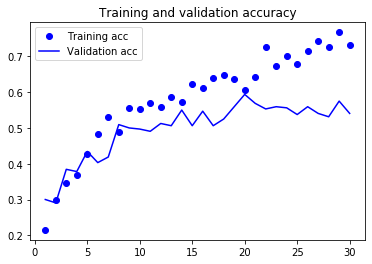

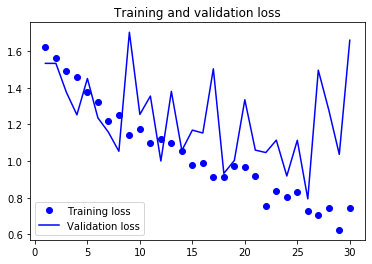

In [75]:
# Построим получившийся график

acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [86]:
# По графикам видим что после 10 эпох начинается эффект переобучения. Это обусловлено относительно малым
# количеством образцов. Попробуем добавить прореживание, сократить веса и возможно сменить оптимизатор
# а также донастроить гиперпараметры чтобы полуить лучший результат.

model7 = models.Sequential()
model7.add(layers.Conv2D(32, (3, 3),
                         activation='relu',
                         input_shape=(150, 225, 3)))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(64, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(128, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(128, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Flatten())
model7.add(layers.Dropout(0.5))
model7.add(layers.Dense(512, activation='relu'))
model7.add(layers.Dense(5, activation='softmax'))

model7.compile(loss='categorical_crossentropy',
               optimizer=optimizers.Adam(learning_rate=0.0001),
               metrics=['acc'])
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

ImageFile.LOAD_TRUNCATED_IMAGES = True

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 225),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 225),
    batch_size=32,
    class_mode='categorical')

history7 = model7.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=25,
    validation_data=validation_generator)

model7.save_weights('model7.h5')
print('Обучение завершено')

Found 1600 images belonging to 5 classes.
Found 320 images belonging to 5 classes.
Epoch 1/25
 1/50 [..............................] - ETA: 2:12 - loss: 1.5895 - acc: 0.2188

C:\Users\e.zotkin\Anaconda3\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


48/50 [===========================>..] - ETA: 3s - loss: 1.6040 - acc: 0.2331

C:\Users\e.zotkin\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 4. Skipping tag 41486
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\e.zotkin\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)


50/50 [==============================] - 86s 2s/step - loss: 1.6021 - acc: 0.2394 - val_loss: 1.5948 - val_acc: 0.3156
Epoch 2/25
50/50 [==============================] - 79s 2s/step - loss: 1.4554 - acc: 0.4162 - val_loss: 1.3642 - val_acc: 0.4437
Epoch 3/25
50/50 [==============================] - 77s 2s/step - loss: 1.2359 - acc: 0.5069 - val_loss: 1.4775 - val_acc: 0.4531
Epoch 4/25
50/50 [==============================] - 78s 2s/step - loss: 1.1274 - acc: 0.5581 - val_loss: 1.2009 - val_acc: 0.5156
Epoch 5/25
50/50 [==============================] - 76s 2s/step - loss: 0.9983 - acc: 0.6206 - val_loss: 1.2241 - val_acc: 0.5188
Epoch 6/25
50/50 [==============================] - 77s 2s/step - loss: 0.9286 - acc: 0.6538 - val_loss: 1.4015 - val_acc: 0.5406
Epoch 7/25
50/50 [==============================] - 76s 2s/step - loss: 0.8331 - acc: 0.6875 - val_loss: 1.2001 - val_acc: 0.5437
Epoch 8/25
50/50 [==============================] - 77s 2s/step - loss: 0.7732 - acc: 0.6988 - val_lo

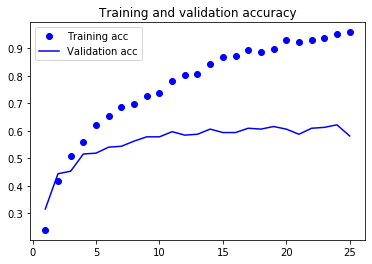

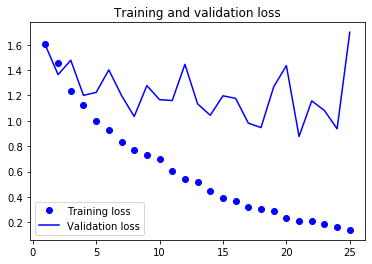

In [87]:
acc = history7.history['acc']
val_acc = history7.history['val_acc']
loss = history7.history['loss']
val_loss = history7.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [88]:
# Теперь мы используем генератор изображений для искусственного увеличения количества образцов.
# Чтобы увеличить количество входящий образцов на 1 порядок увеличим параметр steps_per_epoch на 1 порядок.

model8 = models.Sequential()
model8.add(layers.Conv2D(32, (3, 3),
                         activation='relu',
                         input_shape=(150, 225, 3)))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(64, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(128, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(128, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Flatten())
model8.add(layers.Dropout(0.5))
model8.add(layers.Dense(512, activation='relu'))
model8.add(layers.Dense(5, activation='softmax'))

model8.compile(loss='categorical_crossentropy',
               optimizer=optimizers.Adam(learning_rate=0.0001),
               metrics=['acc'])
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)

ImageFile.LOAD_TRUNCATED_IMAGES = True

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 225),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 225),
    batch_size=32,
    class_mode='categorical')

history8 = model8.fit_generator(
    train_generator,
    steps_per_epoch=500,
    epochs=25,
    validation_data=validation_generator)

model8.save_weights('model8.h5')
print('Обучение завершено')

Found 1600 images belonging to 5 classes.
Found 320 images belonging to 5 classes.
Epoch 1/25
  4/500 [..............................] - ETA: 16:53 - loss: 1.6171 - acc: 0.1953

C:\Users\e.zotkin\Anaconda3\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 24/500 [>.............................] - ETA: 13:54 - loss: 1.6129 - acc: 0.2070

C:\Users\e.zotkin\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 4. Skipping tag 41486
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\e.zotkin\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)


500/500 [==============================] - 842s 2s/step - loss: 1.5110 - acc: 0.3144 - val_loss: 1.4565 - val_acc: 0.3781
Epoch 2/25
500/500 [==============================] - 838s 2s/step - loss: 1.3794 - acc: 0.4085 - val_loss: 1.7279 - val_acc: 0.4531
Epoch 3/25
500/500 [==============================] - 840s 2s/step - loss: 1.2885 - acc: 0.4711 - val_loss: 1.4922 - val_acc: 0.5031
Epoch 4/25
500/500 [==============================] - 838s 2s/step - loss: 1.2012 - acc: 0.5163 - val_loss: 1.4739 - val_acc: 0.5031
Epoch 5/25
500/500 [==============================] - 835s 2s/step - loss: 1.1411 - acc: 0.5436 - val_loss: 1.0408 - val_acc: 0.5344
Epoch 6/25
500/500 [==============================] - 834s 2s/step - loss: 1.0705 - acc: 0.5709 - val_loss: 1.0007 - val_acc: 0.5219
Epoch 7/25
500/500 [==============================] - 839s 2s/step - loss: 1.0177 - acc: 0.6003 - val_loss: 1.0864 - val_acc: 0.5375
Epoch 8/25
500/500 [==============================] - 835s 2s/step - loss: 0.975

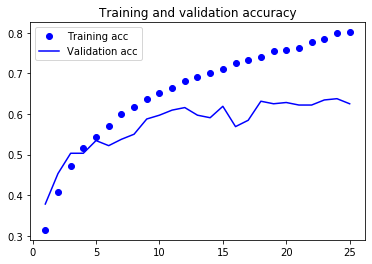

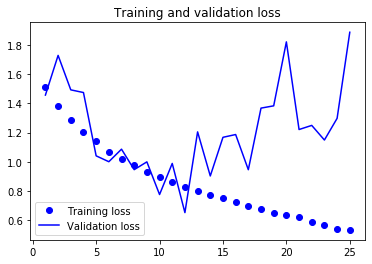

In [89]:
# Построим графики. Отчётливо видим наступающий после 10 эпох эффект переобучения. Используя прореживание
# и искусственное увеичение образцов мы смогли "отодвинуть" момент наступления переобучения и получили
# значение точности на проверочных данных ~0.6. Не плохо но пока и не хорошо.

acc = history8.history['acc']
val_acc = history8.history['val_acc']
loss = history8.history['loss']
val_loss = history8.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [101]:
# Попробуем улучшить показатели использовав метод выделения признаков.

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 225, 3))

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 7, 512))
    labels = np.zeros(shape=(sample_count, 5))
    generator = datagen.flow_from_directory(
    directory,
    target_size=(150, 225),
    batch_size=32,
    class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 1600)
validation_features, validation_labels = extract_features(val_dir, 320)
test_features, test_labels = extract_features(test_dir, 80)

train_features = np.reshape(train_features, (1600, 4 * 7 * 512))
validation_features = np.reshape(validation_features, (320, 4 * 7 * 512))
test_features = np.reshape(test_features, (80, 4 * 7 * 512))

model9 = models.Sequential()
model9.add(layers.Dense(512, activation='relu', input_dim=4 * 7 * 512))
model9.add(layers.Dropout(0.5))
model9.add(layers.Dense(5, activation='softmax'))

model9.compile(loss='categorical_crossentropy',
               optimizer=optimizers.Adam(learning_rate=0.0001),
               metrics=['acc'])

history9 = model9.fit(train_features, train_labels,
    epochs=25,
    batch_size=32,
    validation_data=(validation_features, validation_labels))

model9.save_weights('model9.h5')
print('Обучение завершено')

Found 1600 images belonging to 5 classes.
Found 320 images belonging to 5 classes.
Found 80 images belonging to 5 classes.
Train on 1600 samples, validate on 320 samples
Epoch 1/25
1600/1600 [==============================] - 8s 5ms/step - loss: 1.3077 - acc: 0.4663 - val_loss: 0.8234 - val_acc: 0.7063
Epoch 2/25
1600/1600 [==============================] - 8s 5ms/step - loss: 0.6818 - acc: 0.7544 - val_loss: 0.6550 - val_acc: 0.7406
Epoch 3/25
1600/1600 [==============================] - 8s 5ms/step - loss: 0.5188 - acc: 0.8238 - val_loss: 0.6271 - val_acc: 0.7656
Epoch 4/25
1600/1600 [==============================] - 8s 5ms/step - loss: 0.3891 - acc: 0.8731 - val_loss: 0.5999 - val_acc: 0.7812
Epoch 5/25
1600/1600 [==============================] - 8s 5ms/step - loss: 0.3150 - acc: 0.8944 - val_loss: 0.5788 - val_acc: 0.7781
Epoch 6/25
1600/1600 [==============================] - 8s 5ms/step - loss: 0.2759 - acc: 0.9169 - val_loss: 0.6186 - val_acc: 0.7781
Epoch 7/25
1600/1600 [====

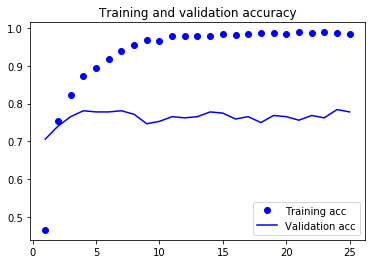

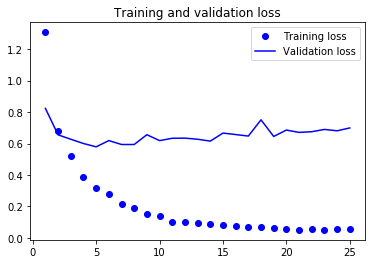

In [102]:
# Теперь мы достигли точности в 78%, однако быстро получили эффект переобучения, буквально с 4-ой эпохи.

acc = history9.history['acc']
val_acc = history9.history['val_acc']
loss = history9.history['loss']
val_loss = history9.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
# Теперь используем замороженную свёрточную основу VGG16 поверх которой проведём обучение на нашем генераторе

model11 = models.Sequential()
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 225, 3))
model11.add(conv_base)
model11.add(layers.Flatten())
model11.add(layers.Dense(512, activation='relu'))
model11.add(layers.Dense(5, activation='softmax'))

conv_base.trainable = False

model11.compile(loss='categorical_crossentropy',
               optimizer=optimizers.Adam(learning_rate=0.0001),
               metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

ImageFile.LOAD_TRUNCATED_IMAGES = True

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 225),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 225),
    batch_size=32,
    class_mode='categorical')

history11 = model11.fit_generator(
    train_generator,
    steps_per_epoch=500,
    epochs=15,
    validation_data=validation_generator)

print('Обучение завершено')


Found 1600 images belonging to 5 classes.
Found 320 images belonging to 5 classes.

Epoch 1/15
  2/500 [..............................] - ETA: 49:34 - loss: 1.7465 - acc: 0.2188  

C:\Users\e.zotkin\Anaconda3\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


  5/500 [..............................] - ETA: 37:35 - loss: 1.7782 - acc: 0.2125

C:\Users\e.zotkin\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 4. Skipping tag 41486
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\e.zotkin\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)


500/500 [==============================] - 1887s 4s/step - loss: 0.9001 - acc: 0.6416 - val_loss: 0.9047 - val_acc: 0.6812
Epoch 2/15
500/500 [==============================] - 1867s 4s/step - loss: 0.6518 - acc: 0.7534 - val_loss: 0.5870 - val_acc: 0.7656
Epoch 3/15
500/500 [==============================] - 1651s 3s/step - loss: 0.5609 - acc: 0.7852 - val_loss: 0.5695 - val_acc: 0.7844
Epoch 4/15
500/500 [==============================] - 1646s 3s/step - loss: 0.5229 - acc: 0.8004 - val_loss: 0.4687 - val_acc: 0.7469
Epoch 5/15
500/500 [==============================] - 1652s 3s/step - loss: 0.4744 - acc: 0.8219 - val_loss: 0.6808 - val_acc: 0.7250
Epoch 6/15
500/500 [==============================] - 1655s 3s/step - loss: 0.4417 - acc: 0.8361 - val_loss: 0.9464 - val_acc: 0.7656
Epoch 7/15
500/500 [==============================] - 1632s 3s/step - loss: 0.4034 - acc: 0.8468 - val_loss: 1.2300 - val_acc: 0.7469
Epoch 8/15
500/500 [==============================] - 1629s 3s/step - los

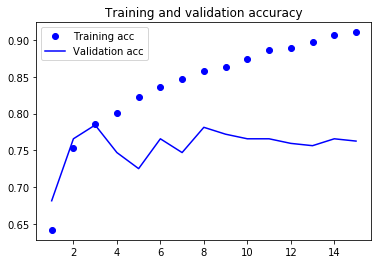

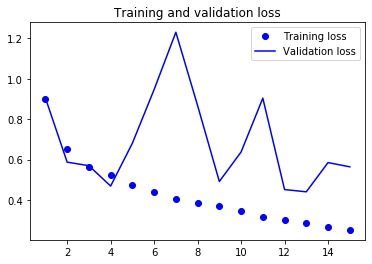

In [9]:
# Обучение с расширением не принесло положительного результата. Для такого метода следует использовать более
# специализированную на технике (мототехнике) обученную сеть чем VGG16. Мы остановимся на реpультате 9-ой модели 78%.

acc = history11.history['acc']
val_acc = history11.history['val_acc']
loss = history11.history['loss']
val_loss = history11.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()